In [6]:
import numpy as np
from nilearn import plotting
from nilearn import image
import matplotlib.pyplot as plt
import subprocess
import os
%matplotlib inline

In [9]:
#set directories
curr_dir = f'/user_data/vayzenbe/GitHub_Repos/fmri'

roi_dir= f'{curr_dir}/roiParcels'
#list out ROIs
rois = ['lPPC','rPPC','ventral_visual_cortex'] 

In [16]:
anat= image.load_img(f'/opt/fsl/6.0.3/data/standard/MNI152_T1_2mm_brain.nii.gz')
dorsal_roi = image.load_img(f'{roi_dir}/pIPS.nii.gz')
study_dir = '/lab_data/behrmannlab/vlad/DOC/'
cope = 3
loc_dir = f'DOTS_func/HighLevel.gfeat/cope{cope}.feat/stats/zstat1.nii.gz'

thresh = 3.1

#create list of subs labled DOC1000 to DOC1009
subs = [f'DOC{sub:04d}' for sub in range(1000,1010)]

#create empty brain mask
brain_mask = image.new_img_like(anat, np.zeros(anat.shape))

for sub in subs:
    zstat = image.load_img(f'{study_dir}/{sub}/{loc_dir}')

    #threshold image 
    zstat_thresh = image.threshold_img(zstat, threshold=thresh, cluster_threshold=10, two_sided=False)

    #binarize image 
    zstat_bin = image.math_img('img > 0', img=zstat_thresh)

    #add binarized image to brain mask
    brain_mask = image.math_img('a+b', a=brain_mask, b=zstat_bin)



#rescale between 0 and 1
brain_mask = image.math_img('(img - np.min(img)) / (np.max(img) - np.min(img))', img=brain_mask)    

#save brain mask depth probability
brain_mask.to_filename(f'{roi_dir}/probabilistic_depth_map.nii.gz')




 



/home/vayzenbe/anaconda3/envs/fmri/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



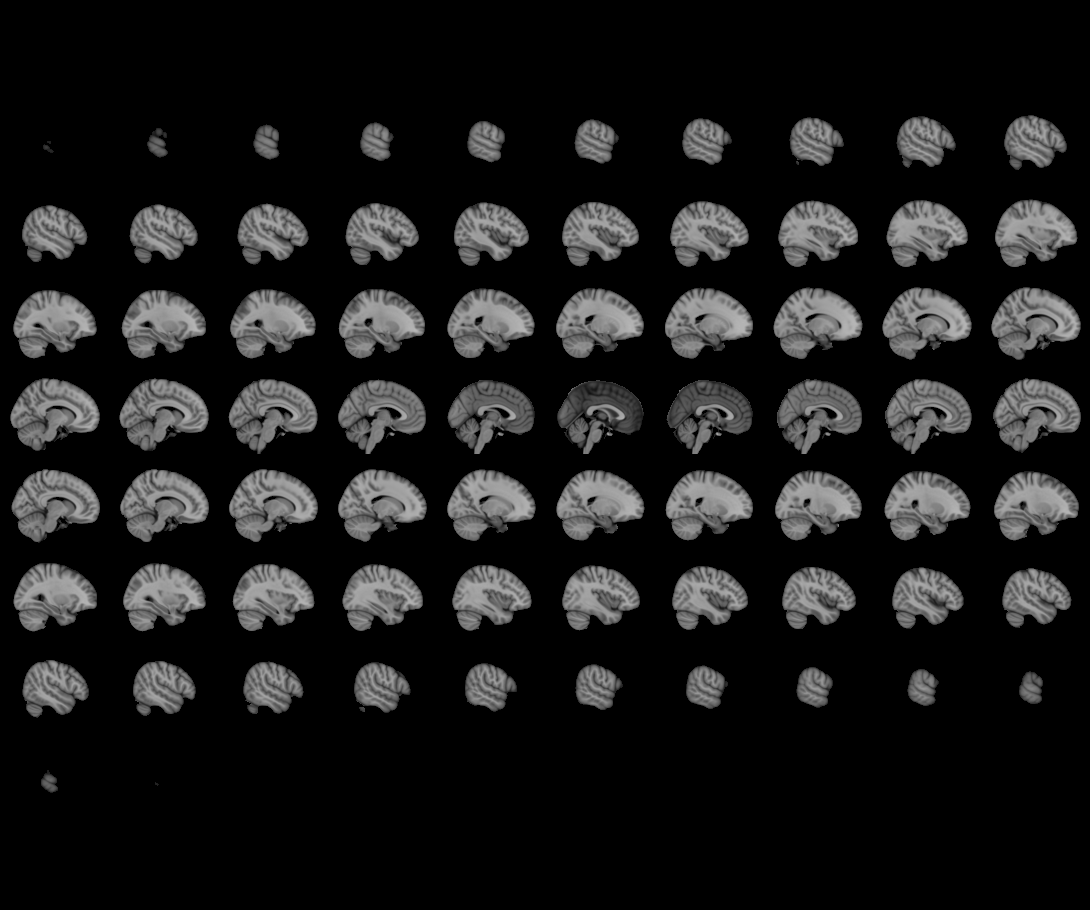
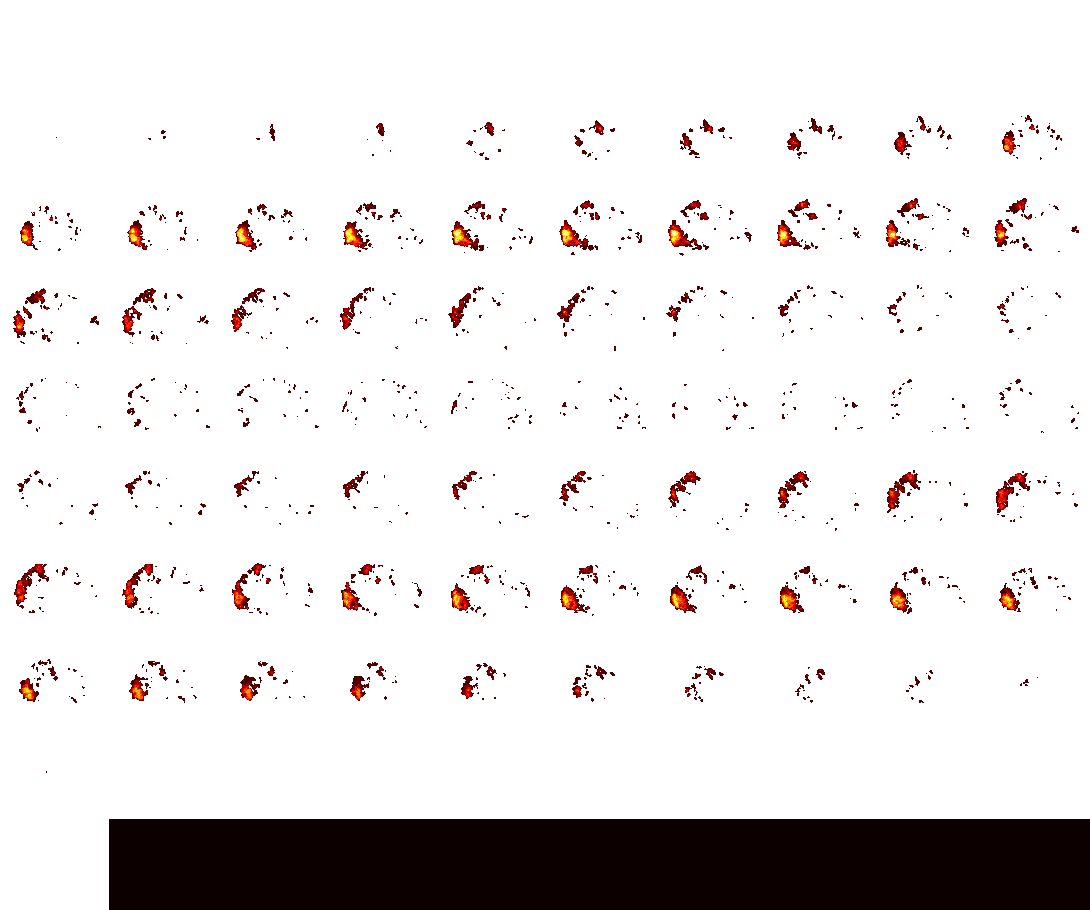

In [17]:

plotting.view_img(brain_mask,bg_img=anat, opacity=.5) #show ROI in interactive figure